#### Generate scatter plots for selected features.

#### Import necessary libraries.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder


#### Load the dataset.

In [2]:

df = None

dtypes = {"commit_id": "str", "project" : "str", "buggy" : "str", "fix" : "str", "year" : "str", "author_date" : "str",
          "la" : "int16", "ld" : "int16", "nf" : "int16", "nd" : "int16", "ns" : "int16", "ent" : "float64",
          "ndev" : "float64", "age" : "float64", "nuc" : "float64", "aexp" : "int16", "arexp" : "float64", "asexp" : "float64"}

try:
    print("\nStart loading CSV file...")
    df = pd.read_csv("../dataset/java/apachejit_total.csv", sep = ",", dtype = dtypes)
    print("\nFinish loading CSV file...")
except Exception as e:
    print("\nFail to load CSV file.")
    print("Error: {}".format(e))



Start loading CSV file...

Finish loading CSV file...


#### Display dataset size.

In [3]:

df.shape


(106674, 18)

#### Display dataset data types.

In [4]:

df.dtypes


commit_id       object
project         object
buggy           object
fix             object
year            object
author_date     object
la               int16
ld               int16
nf               int16
nd               int16
ns               int16
ent            float64
ndev           float64
age            float64
nuc            float64
aexp             int16
arexp          float64
asexp          float64
dtype: object

#### Remove features that do not represent metrics and features with a correlation greater than 70%.

In [5]:

df = df.drop(columns = ["commit_id", "project", "fix", "year", "author_date", "arexp", "nd", "nf", "ndev"])
le = LabelEncoder()
df["buggy"] = le.fit_transform(df["buggy"])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)


{'False': 0, 'True': 1}


#### Generate scatter plots for each pair of features.

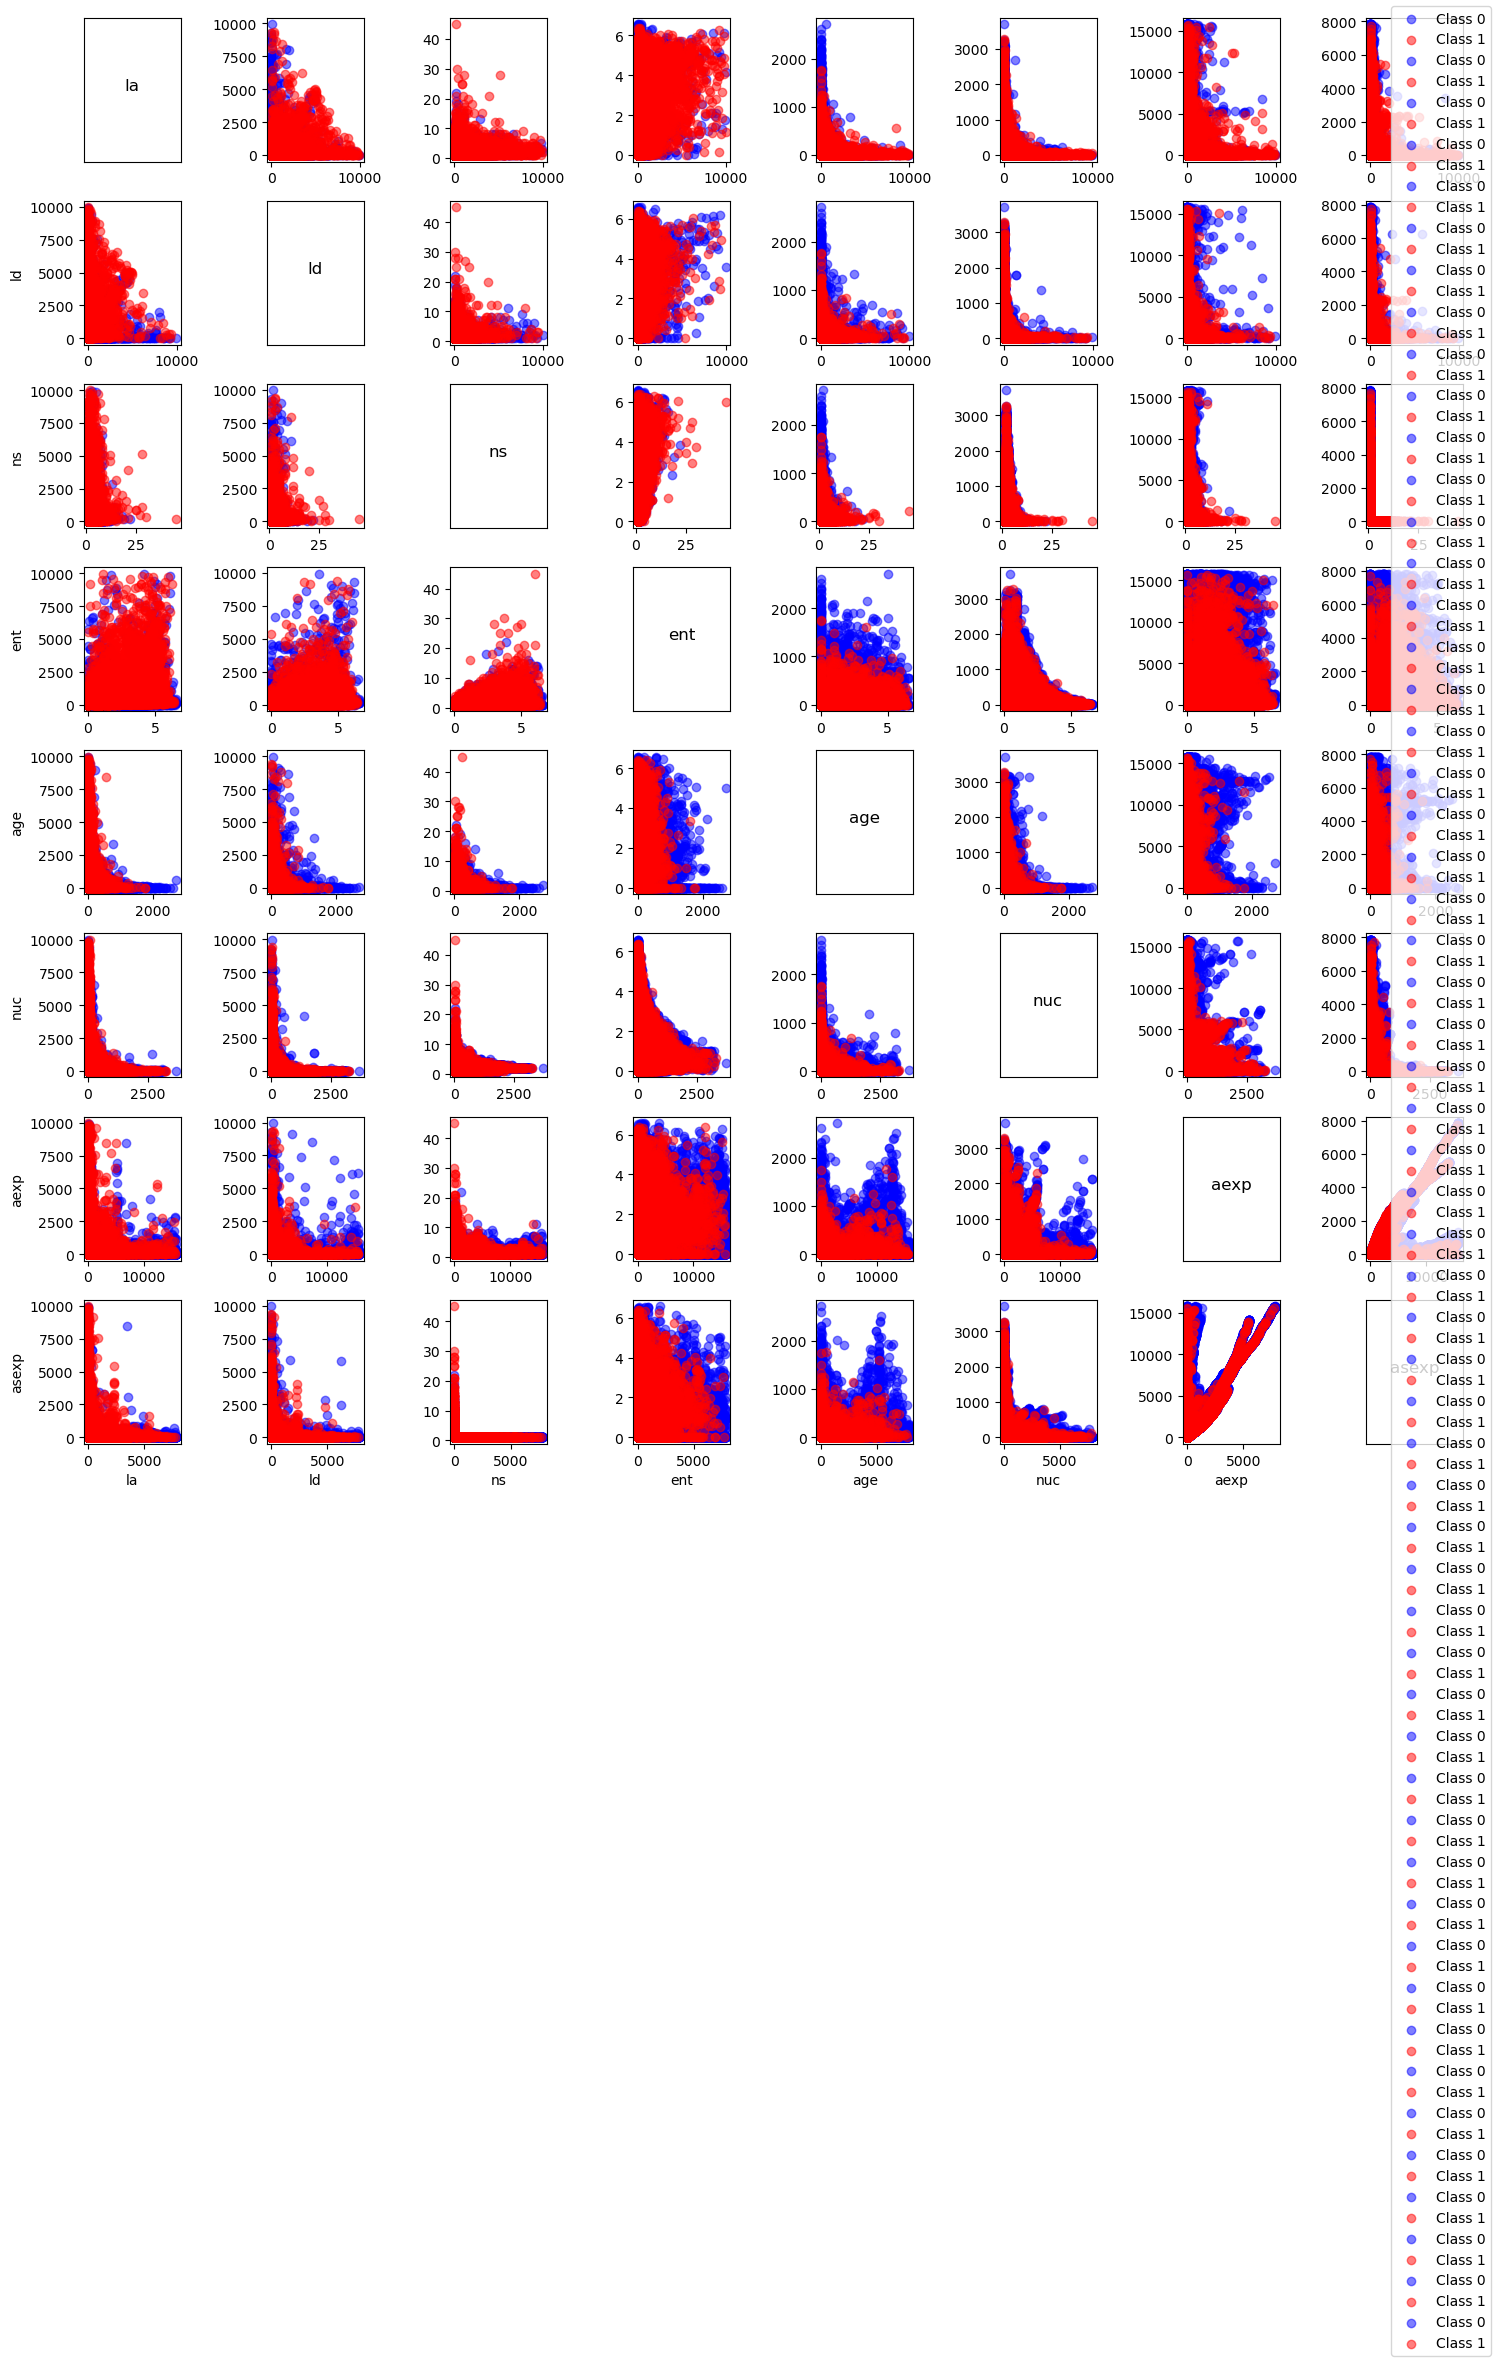

In [6]:

colors = {0: "blue", 1: "red"}
features = ["la", "ld", "ns", "ent", "age", "nuc", "aexp", "asexp"]
num_features = len(features)

fig, axes = plt.subplots(num_features, num_features, figsize = (15, 15))
for i in range(num_features):
    for j in range(num_features):
        if i == j:
            axes[i, j].text(0.5, 0.5, features[i], fontsize = 12, ha = "center")
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
        else:
            for label in df["buggy"].unique():
                subset = df[df["buggy"] == label]
                axes[i, j].scatter(subset[features[i]], subset[features[j]], 
                                   color = colors[label], label = f'Class {label}', alpha = 0.5)
            if i == num_features - 1:
                axes[i, j].set_xlabel(features[j])
            if j == 0:
                axes[i, j].set_ylabel(features[i])

plt.tight_layout()
fig.legend(loc = "upper right")
plt.show()
